In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [21]:

# ============================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ============================================

# Exemple de données (remplacez par votre DataFrame)
# df = pd.read_csv('votre_fichier.csv')

# Simulation de données pour démonstration
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'mstat': np.random.choice(['Marié', 'Célibataire', 'Veuf', 'Union libre'], n_samples),
    'rev_total_mois': np.random.lognormal(12, 1, n_samples).astype(int),
    'age_grp': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56+'], n_samples),
    'empl_formel': np.random.choice(['Oui', 'Non'], n_samples, p=[0.4, 0.6]),
    'bancarise': np.random.choice(['Oui', 'Non'], n_samples, p=[0.5, 0.5]),
    'a_assurance': np.random.choice(['Oui', 'Non'], n_samples, p=[0.3, 0.7]),
    'logem': np.random.choice(['Locataire', 'Proprio avec titre', 'Proprio sans titre', 'Hébergé'], n_samples)
})


In [22]:
print("📊 Aperçu des données:")
print(df.head())
print(f"\n📈 Forme des données: {df.shape}")
print(f"\n🔍 Valeurs manquantes:\n{df.isnull().sum()}")


📊 Aperçu des données:
         mstat  rev_total_mois age_grp empl_formel bancarise a_assurance  \
0         Veuf          229063   18-25         Non       Oui         Oui   
1  Union libre         1062537   18-25         Non       Non         Oui   
2        Marié          421015   46-55         Non       Non         Non   
3         Veuf           91408     56+         Oui       Non         Non   
4         Veuf           66276   36-45         Oui       Non         Non   

                logem  
0  Proprio avec titre  
1             Hébergé  
2  Proprio avec titre  
3           Locataire  
4  Proprio sans titre  

📈 Forme des données: (1000, 7)

🔍 Valeurs manquantes:
mstat             0
rev_total_mois    0
age_grp           0
empl_formel       0
bancarise         0
a_assurance       0
logem             0
dtype: int64


In [23]:

# ============================================
# 2. ENCODAGE DES VARIABLES
# ============================================

df_encoded = df.copy()
label_encoders = {}

# Variables catégorielles à encoder
cat_cols = ['mstat', 'age_grp', 'empl_formel', 'bancarise', 'a_assurance', 'logem']

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\n✅ Encodage terminé")



✅ Encodage terminé


In [24]:
# ============================================
# 3. NORMALISATION
# ============================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

print("✅ Normalisation terminée")


✅ Normalisation terminée



🔬 Recherche du nombre optimal de clusters...


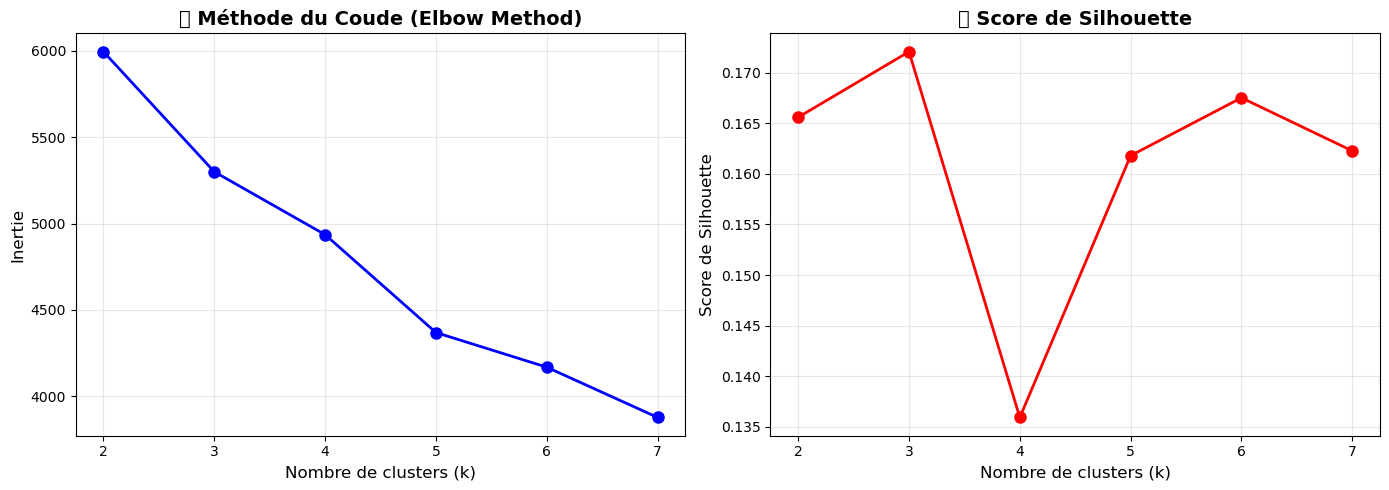


✨ Nombre optimal suggéré: 3 clusters (meilleur score de silhouette: 0.172)


In [25]:


# ============================================
# 4. DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS
# ============================================

print("\n🔬 Recherche du nombre optimal de clusters...")

inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Méthode du coude
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertie', fontsize=12)
axes[0].set_title('📉 Méthode du Coude (Elbow Method)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Score de silhouette
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de clusters (k)', fontsize=12)
axes[1].set_ylabel('Score de Silhouette', fontsize=12)
axes[1].set_title('📊 Score de Silhouette', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Suggestion automatique
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\n✨ Nombre optimal suggéré: {best_k} clusters (meilleur score de silhouette: {max(silhouette_scores):.3f})")


In [26]:

# ============================================
# 5. CLUSTERING FINAL
# ============================================

optimal_k = 4  # Vous pouvez ajuster selon les graphiques
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"\n🎯 Clustering effectué avec {optimal_k} clusters")
print(f"Distribution des clusters:\n{df['cluster'].value_counts().sort_index()}")



🎯 Clustering effectué avec 4 clusters
Distribution des clusters:
cluster
0    247
1    217
2    309
3    227
Name: count, dtype: int64


In [27]:

# ============================================
# 6. ANALYSE DES CLUSTERS (PROFILAGE)
# ============================================

print("\n" + "="*70)
print("📋 PROFIL DES CLUSTERS")
print("="*70)

for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n🏷️  CLUSTER {cluster_id} (n={len(cluster_data)})")
    print("-" * 50)
    
    # Statistiques par variable
    print(f"  💰 Revenu moyen: {cluster_data['rev_total_mois'].mean():.0f} (médiane: {cluster_data['rev_total_mois'].median():.0f})")
    print(f"  👔 Emploi formel: {(cluster_data['empl_formel']=='Oui').mean()*100:.1f}%")
    print(f"  🏦 Bancarisé: {(cluster_data['bancarise']=='Oui').mean()*100:.1f}%")
    print(f"  🏥 Assuré: {(cluster_data['a_assurance']=='Oui').mean()*100:.1f}%")
    print(f"  🏠 Logement principal: {cluster_data['logem'].mode()[0]}")
    print(f"  👥 Statut marital principal: {cluster_data['mstat'].mode()[0]}")
    print(f"  📅 Groupe d'âge principal: {cluster_data['age_grp'].mode()[0]}")


📋 PROFIL DES CLUSTERS

🏷️  CLUSTER 0 (n=247)
--------------------------------------------------
  💰 Revenu moyen: 292119 (médiane: 160282)
  👔 Emploi formel: 100.0%
  🏦 Bancarisé: 47.8%
  🏥 Assuré: 0.0%
  🏠 Logement principal: Locataire
  👥 Statut marital principal: Marié
  📅 Groupe d'âge principal: 18-25

🏷️  CLUSTER 1 (n=217)
--------------------------------------------------
  💰 Revenu moyen: 271868 (médiane: 167406)
  👔 Emploi formel: 0.0%
  🏦 Bancarisé: 55.8%
  🏥 Assuré: 0.0%
  🏠 Logement principal: Proprio avec titre
  👥 Statut marital principal: Union libre
  📅 Groupe d'âge principal: 56+

🏷️  CLUSTER 2 (n=309)
--------------------------------------------------
  💰 Revenu moyen: 288089 (médiane: 185901)
  👔 Emploi formel: 35.6%
  🏦 Bancarisé: 50.8%
  🏥 Assuré: 100.0%
  🏠 Logement principal: Proprio avec titre
  👥 Statut marital principal: Marié
  📅 Groupe d'âge principal: 18-25

🏷️  CLUSTER 3 (n=227)
--------------------------------------------------
  💰 Revenu moyen: 256939 (m

In [28]:


# ============================================
# 7. CRÉATION D'UN SCORE D'INCLUSION FINANCIÈRE
# ============================================

def score_inclusion_financiere(row):
    """Calcule un score d'inclusion financière (0-100)"""
    score = 0
    
    # Bancarisation (30 points)
    if row['bancarise'] == 'Oui':
        score += 30
    
    # Assurance (25 points)
    if row['a_assurance'] == 'Oui':
        score += 15
    
    # Emploi formel (25 points)
    if row['empl_formel'] == 'Oui':
        score += 25
    
    # Logement (20 points)
    if row['logem'] in ['Proprio avec titre', 'Proprio sans titre']:
        score += 30
    elif row['logem'] == 'Locataire':
        score += 10
    
    return score

df['score_inclusion'] = df.apply(score_inclusion_financiere, axis=1)

# Catégorisation du score
def categoriser_inclusion(score):
    if score >= 75:
        return 'Très inclus'
    elif score >= 50:
        return 'Inclus'
    elif score >= 25:
        return 'Partiellement inclus'
    else:
        return 'Exclu'

df['categorie_inclusion'] = df['score_inclusion'].apply(categoriser_inclusion)

print("\n" + "="*70)
print("💯 SCORE D'INCLUSION FINANCIÈRE")
print("="*70)
print(f"\nScore moyen: {df['score_inclusion'].mean():.1f}/100")
print(f"\nDistribution des catégories:")
print(df['categorie_inclusion'].value_counts())



💯 SCORE D'INCLUSION FINANCIÈRE

Score moyen: 46.8/100

Distribution des catégories:
categorie_inclusion
Partiellement inclus    406
Inclus                  316
Très inclus             154
Exclu                   124
Name: count, dtype: int64


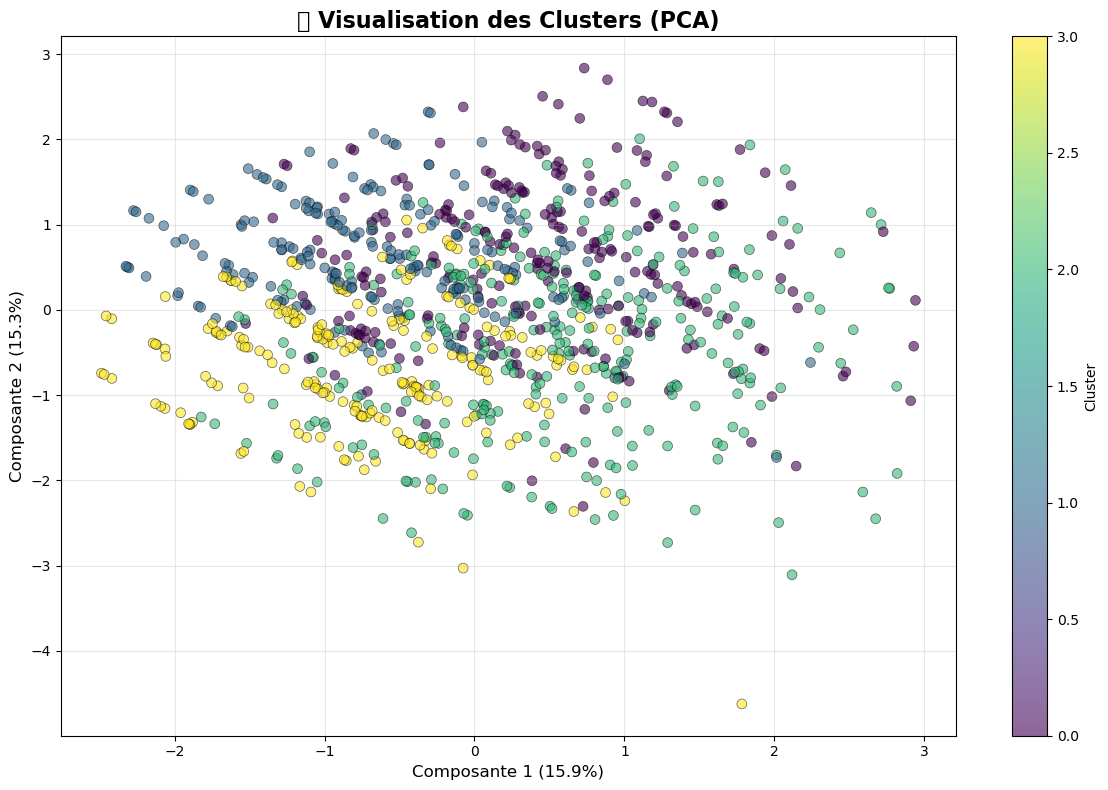

In [29]:

# ============================================
# 8. VISUALISATION PCA (2D)
# ============================================

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=df['cluster'], 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'Composante 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'Composante 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('🗺️ Visualisation des Clusters (PCA)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('clusters_visualization.png', dpi=300, bbox_inches='tight')
plt.show()



🤖 ENTRAÎNEMENT D'UN MODÈLE DE CLASSIFICATION

✅ Précision du modèle: 100.00%

📊 Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        46

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


🎯 Importance des variables:
         variable  importance
5     a_assurance    0.425640
3     empl_formel    0.292451
6           logem    0.195760
1  rev_total_mois    0.046717
2         age_grp    0.017387
0           mstat    0.014922
4       bancarise    0.007123


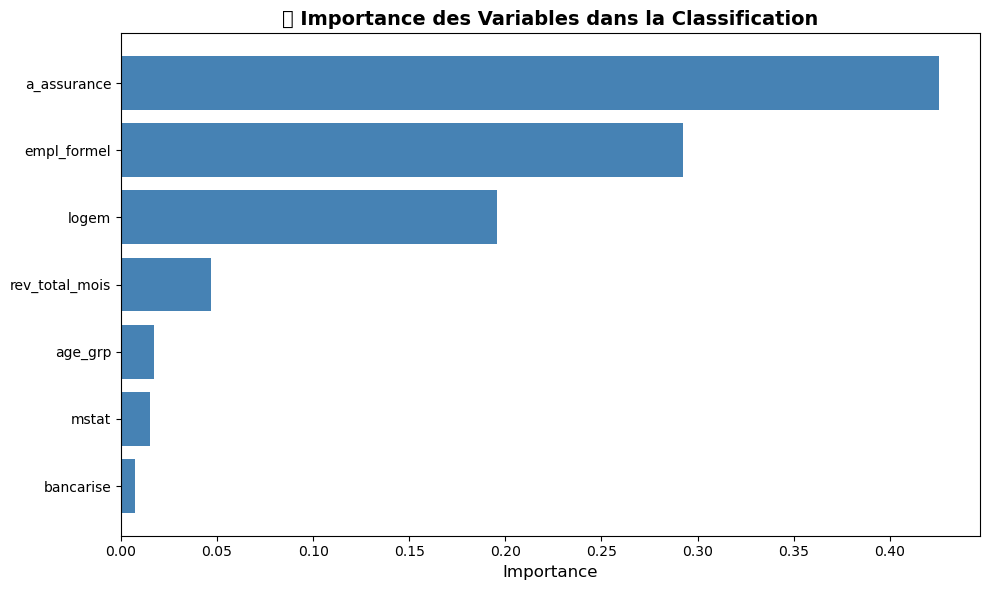

In [32]:

# ============================================
# 9. MODÈLE SUPERVISÉ (CLASSIFICATION)
# ============================================

print("\n" + "="*70)
print("🤖 ENTRAÎNEMENT D'UN MODÈLE DE CLASSIFICATION")
print("="*70)

# Utilisation du cluster comme variable cible
X = df_encoded.drop(columns=['cluster', 'score_inclusion', 'categorie_inclusion'], errors='ignore')
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"\n✅ Précision du modèle: {accuracy*100:.2f}%")
print("\n📊 Rapport de classification:")
print(classification_report(y_test, y_pred))

# Importance des variables
feature_importance = pd.DataFrame({
    'variable': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🎯 Importance des variables:")
print(feature_importance)

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['variable'], feature_importance['importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.title('📊 Importance des Variables dans la Classification', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [31]:

# ============================================
# 10. SAUVEGARDE DES RÉSULTATS
# ============================================

# Sauvegarder le dataset avec les nouvelles variables
df.to_csv('donnees_avec_clusters.csv', index=False)
print("\n💾 Dataset sauvegardé: 'donnees_avec_clusters.csv'")

print("\n" + "="*70)
print("✨ PROCESSUS TERMINÉ AVEC SUCCÈS!")
print("="*70)
print("\n📌 Prochaines étapes recommandées:")
print("  1. Analyser les profils de clusters pour leur donner des noms significatifs")
print("  2. Utiliser 'cluster' comme variable cible pour prédire de nouveaux clients")
print("  3. Utiliser 'score_inclusion' pour cibler des actions spécifiques")
print("  4. Ajuster le nombre de clusters selon vos besoins métier")
print("  5. Collecter plus de données pour améliorer les prédictions")


💾 Dataset sauvegardé: 'donnees_avec_clusters.csv'

✨ PROCESSUS TERMINÉ AVEC SUCCÈS!

📌 Prochaines étapes recommandées:
  1. Analyser les profils de clusters pour leur donner des noms significatifs
  2. Utiliser 'cluster' comme variable cible pour prédire de nouveaux clients
  3. Utiliser 'score_inclusion' pour cibler des actions spécifiques
  4. Ajuster le nombre de clusters selon vos besoins métier
  5. Collecter plus de données pour améliorer les prédictions
